# importing and sigmoid class

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,log_loss,accuracy_score
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [ ]:
class SigmoidNeuron:
  #parameters declaration
  def __init__(self):
    self.w = None
    self.b = None
  #model
  def perceptron(self,x):
    return np.dot(x , self.w.T)+self.b
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  #for predicting outputs
  def predict(self,X):
    pred_values = []
    for x in X:
      pred_values.append(self.sigmoid(self.perceptron(x)))
    return np.asarray(pred_values)
  #gradient functions for both the losses mean_squared_loss and cross_entropy
  def grad_w_mse(self,x,y):
    pred_y = self.sigmoid(self.perceptron(x))
    return (pred_y-y)*pred_y*(1-pred_y)*x
  def grad_b_mse(self,x,y):
    pred_y = self.sigmoid(self.perceptron(x))
    return (pred_y-y)*pred_y*(1-pred_y)
  def grad_w_ce(self,x,y):
    pred_y = self.sigmoid(self.perceptron(x))
    if y==0:
      return pred_y*x
    elif y==1:
      return -1*(1-pred_y)*x
    else:
      raise ValueError("y should be 0 or 1")
  def grad_b_ce(self,x,y):
    pred_y = self.sigmoid(self.perceptron(x))
    if y==0:
      return pred_y
    elif y==1:
      return -1*(1-pred_y)
    else:
      raise ValueError("y should be 0 or 1")
  #fitting the model
  def fit(self,X,Y,epochs = 1,lr = 1,initialize = True,loss_func = "mse",display_loss = False):
    if initialize:
      self.w = np.random.randn(X.shape[1])
      self.b = 0
    if display_loss:
      loss = {}
    for i in tqdm_notebook(range(epochs),unit='epoch',total = epochs):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        if loss_func == "mse":
          dw += self.grad_w_mse(x,y)
          db += self.grad_b_mse(x,y)
        elif loss_func == "ce":
          dw += self.grad_w_ce(x,y)
          db += self.grad_b_ce(x,y)
      m = X.shape[1]
      self.w -= lr * dw/m
      self.b -= lr * db/m
      if display_loss:
        pred_y = self.sigmoid(self.perceptron(X))
        if loss_func == "mse":
          loss[i] = mean_squared_error(Y,pred_y)
        elif loss_func == "ce":
          loss[i] = log_loss(Y,pred_y)
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel("epochs")
      if loss_func == "mse":
        plt.ylabel("mean_squared_error")  
      elif loss_func == "ce":
        plt.ylabel("cross_entropy")
      plt.show()

In [ ]:
#implementing our color map
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","blue"])

# Generating data

In [ ]:
#using make_blobs() function variable is center=4 we will cluster the data into 4,n_samples=1000 we will give 1000 data points and n_features = 2 which will takes 2 input features and to make same output when we run we place random_state = 0
data,labels = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 0)
print(data.shape,labels.shape)

(1000, 2) (1000,)


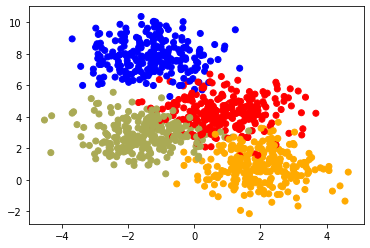

In [ ]:
#above output shape gives 1000 rows and 2 inputs represent 1000 data points and we need 1000 output labels for each input so labels shape is also 1000
plt.scatter(data[:,0],data[:,1],c = labels,cmap=my_cmap)
plt.show()

In [ ]:
#so we have 4 clusters but we first try to do binary classification for this we need 2 clusters for that we need to do like this.
original_labels = labels
labels = np.mod(original_labels,2)

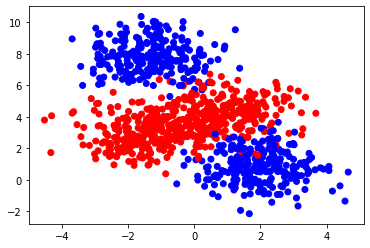

In [ ]:
plt.scatter(data[:,0],data[:,1],c = labels,cmap=my_cmap)
plt.show()

In [ ]:
# the above is completely non linear data and we have classified into 2 like we are doing modulus suppose for the 4 clusters graph if we take blue = 0,red = 1,yellow = 2,green = 3, so by mod 2 we get blue and yellow as 0's and red and green as 1's as plotted above
x_train,x_val,y_train,y_val = train_test_split(data , labels , random_state = 0 , stratify = labels)
print(x_train.shape,x_val.shape,y_train.shape,y_val.shape)

(750, 2) (250, 2) (750,) (250,)


# SN classification

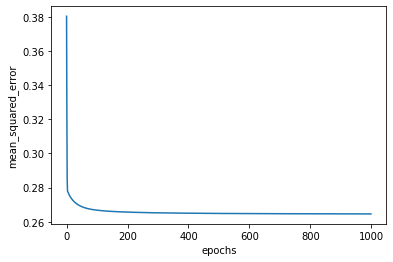

In [ ]:
sn = SigmoidNeuron()
sn.fit(x_train,y_train,epochs = 1000,lr = 0.05,display_loss = True)

In [ ]:
pred_y_train = sn.predict(x_train)
pred_y_val = sn.predict(x_val)
# we need to converted the predicted values . these should be in binarized way because we have y_val and y_train in binary values 
pred_y_binarized_train = (pred_y_train>0.5).astype("int").ravel()
pred_y_binarized_val = (pred_y_train >0.5).astype("int").ravel()
accuracy_train = accuracy_score(pred_y_binarized_train,y_train)
accuracy_val = accuracy_score(pred_y_binarized_val,y_train)
print("training accuracy",accuracy_train)
print("validation accuracy",accuracy_val)

training accuracy 0.7346666666666667
validation accuracy 0.7346666666666667


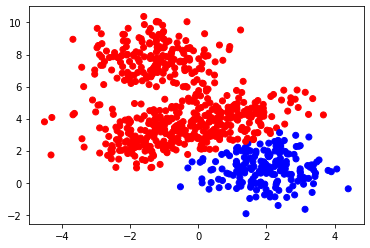

In [ ]:
# we need to know the what are the data points that are plotted correctly we can do that by
plt.scatter(x_train[:,0],x_train[:,1],c=pred_y_binarized_train,cmap = my_cmap)
plt.show()

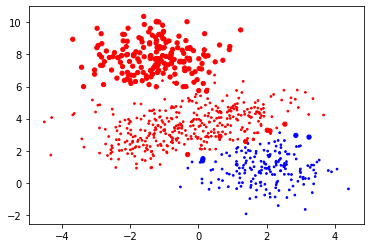

In [ ]:
# the above plot the points which are correctly classified we can make different sizes as follows
plt.scatter(x_train[:,0],x_train[:,1],c = pred_y_binarized_train,cmap = my_cmap,s = 15*(abs(y_train-pred_y_binarized_train)+0.2))
plt.show()

In [ ]:
# the above plot shows 4 dimensions which are the x axis and y axis and the colors for the correctly classified things and sizes for the wrongly classified things 


# FF neural network 
 - one hidden layer with 2 neurons and 2 input features.

In [ ]:
class FFNeuralNetwork:
  def __init__(self):
    self.w111 = np.random.randn()
    self.w112 = np.random.randn()
    self.w121 = np.random.randn()
    self.w122 = np.random.randn()
    self.w211 = np.random.randn()
    self.w212 = np.random.randn()
    self.b11 = 0
    self.b12 = 0
    self.b21 = 0
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  def forwardpass(self,x):
    self.x1,self.x2 = x
    self.a11 = self.w111*self.x1+self.w112*self.x2+self.b11
    self.h11 = self.sigmoid(self.a11)
    self.a12 = self.w121*self.x1+self.w122*x2+self.b12
    self.h12 = self.sigmoid(self.a12)
    self.a21 = self.w211*self.h11 + self.w212*self.h12+self.b12
    self.h21 = self.sigmoid(self.a21)
    return self.h21
  def grad(x,y):
    pred_y = self.forwardpass(self,x,y):
    self.w111 = 
    self.w112 = 
    self.w121 = 
    self.w122 = 
    self.w211 = 
    self.w212 = 
    self.b11 = 
    self.b12 = 
    self.b21 = 
  def fit(self,X,Y,epochs=1,lr = 1,initialize=True,display_loss=False):
    if initialize:
          self.w111 = np.random.randn()
          self.w112 = np.random.randn()
          self.w121 = np.random.randn()
          self.w122 = np.random.randn()
          self.w211 = np.random.randn()
          self.w212 = np.random.randn()
          self.b11 = 0
          self.b12 = 0
          self.b21 = 0
    if display_loss:
      loss = {}
    for i in tqdm_notebook(range(epochs),unit = 'epoch',total = epochs):
      dw111,dw112,dw121,dw122,dw211,dw212,db11,db12,db21 = [0]*9
    for x,y in zip(X,Y):
        self.grad(x,y)
        dw111 += self.dw111
        dw112 += self.dw112
        dw121 += self.dw121
        dw122 += self.dw122
        dw211 += self.dw211
        dw212 += self.dw212
        db11 += self.db11
        db12 += self.db12
        db21 += self.db21
      m = X.shape[1]
      self.w111 -= lr * dw111/m
      self.w112 -= lr * dw112/m
      self.w121 -= lr * dw121/m
      self.w122 -= lr * dw122/m
      self.w211 -= lr * dw211/m
      self.w212 -= lr * dw212/m
      self.b11 -= lr * db11/m
      self.b12 -= lr * db12/m
      self.b21 -= lr * db21/m
      if display_loss:
        pred_y = self.predict(X)
        loss[i] = mean_squared_error(Y,pred_y)
    if display_loss:
      plt.xlabel("epochs")
      plt.ylabel("mean squared error")
      plt.plot(list(loss.values()))
      plt.show()
  def predict(self,X):
    pred_values = []
    for x in X:
      pred_values.append(self.forwardpass(x))
    return np.asarray(pred_values)
  


# Generic FF network

In [ ]:
class GenericFF:
  #declaring the parameters generically like no of hidden layers and their sizes input sizes and output sizes
  def __init__(self,n_inputs,hidden_sizes=[2]):
    # here hidden sizes [2] includes 1 neural network with neurons 2. we have n1 neurons of 1st layer and so on nh includes total layers size
    self.nx = n_inputs
    self.nh = len(hidden_sizes)
    self.ny = 1
    self.total_sizes = [n_inputs]+hidden_sizes+[ny]
    self.W = {}
    self.B = {}
    for i in range(nh+1):
      self.W[i+1] = np.random.randn(self.total_sizes[i],self.total_sizes[i+1])# here we have nx inputs and n1 neurons in first layer which gives dimension nx rows and n1 columns
      self.B[i+1] = np.random.randn(1,self.total_sizes[i+1]) # we need bias for no of neurons in the layer so we place i+1.
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  # in forward class we need to cal preactivation and activation
  def forwardclass(self,x):
    self.A={}
    self.H={}
    self.H[0] = x.reshape(1,-1) # it will resize into single row and multiple columns it is a way to flatten inputs.
    for i in range(nh+1):
      self.A[i+1] = np.matmul(self.H[i],self.w[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    return self.H(self.nh+1)
  def fit(self,X,Y,epochs=1,lr=1,initialize=True,display_loss = False):
    if initialize:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.total_sizes[i],self.total_sizes[i+1])
        self.B[i+1] = np.random.randn(self.total_sizes[i+1])
    if display_loss:
      loss={}
    for i in tqdm_notebook(range(epochs),unit='epoch',total = epochs):
      #we need to initialize dw's and db's
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros(self.total_sizes[i],self.total_sizes[i+1])
        dB[i+1] = np.zeros(1,self.total_sizes[i+1])
      for x,y in zip(X,Y):
        for i in range(self.nh+1):
          self.grad(x,y)
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
      m = X.shape[1]
      for i in range(nh+1):
        self.W[i+1] -= lr * dW[i+1]/m
        self.B[i+1] -= lr * dB[i+1]/m
      if display_loss:
        pred_y = self.predict(X)
        loss[i] = mean_squared_error(Y,pred_y)
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel("epochs")
      plt.ylabe("mean squared error")
  def predict(self,X):
    predicted_val = []
    for x in X:
      predicted_val.append(self.forwardclass(x))
    return np.array(predicted_val).squeeze()